## Web Scraping Practice

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from bs4 import BeautifulSoup as BS

In [2]:
url = 'https://resultados.as.com/resultados/futbol/primera/2023_2024/clasificacion/'
page = requests.get(url)
soup = BS(page.content, 'html.parser')

#Teams

tms = soup.find_all('span', class_ = 'nombre-equipo')

teams = []

for i in tms[:20]:
    teams.append(i.text)
    
#Points

pts = soup.find_all('td', class_ = 'destacado')

points = []

for i in pts[:20]:
    points.append(i.text)

df = pd.DataFrame({'Team' : teams, 'Points' : points})
                  
df

,Team,Points
0,Girona,49
1,Real Madrid,48
2,Athletic,41
3,Barcelona,41
4,Atlético,38
5,R. Sociedad,32
6,Betis,31
7,Valencia,29
8,Las Palmas,28
9,Getafe,26


In [3]:
df['Place'] = range(1, 21)
df.set_index('Place', inplace=True)

df

,Team,Points
Place,,
1,Girona,49
2,Real Madrid,48
3,Athletic,41
4,Barcelona,41
5,Atlético,38
6,R. Sociedad,32
7,Betis,31
8,Valencia,29
9,Las Palmas,28


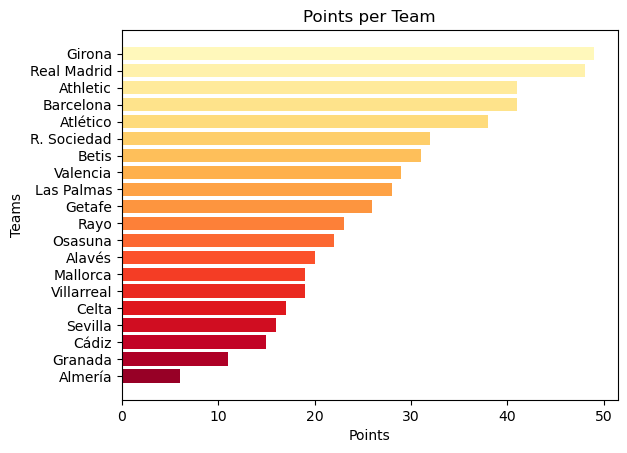

In [4]:
df['Points'] = pd.to_numeric(df['Points'])

visual = plt.barh(df['Team'],df['Points'], color = sbn.color_palette("YlOrRd", n_colors=len(points)))

plt.xlabel('Points')
plt.ylabel('Teams')
plt.title('Points per Team')
plt.gca().invert_yaxis()
